# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Abstract:**

###A bicycle-sharing system, bike share program, public bicycle scheme, or public bike share (PBS) scheme is a shared transport service in which bicycles are made available for shared use to individuals on a short-term basis for a price or free.
###Predicting bike-sharing demand can help bike-sharing companies to allocate bikes better and ensure sufficient circulation of bikes for customers.


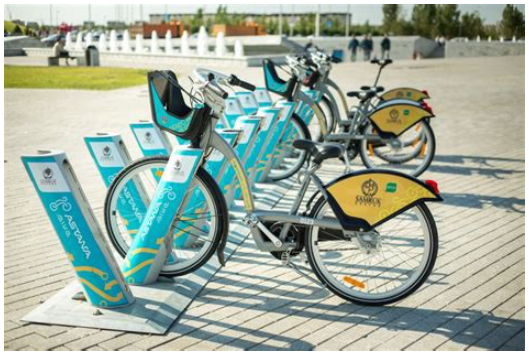



###1.   **Understanding the problem**: We will analyze the given dataset and find meaningful assumptions regarding the significance of this problem.
###2.   **EDA**: While doing Exploratory Data Analysis, we will find meaningful information from the dataset.


###3.  **Applying Models**: We will use different regression models and find which model best fits our dataset to find the best prediction. 

###4. **Feature Importance**: We will also obtain which features will most likely affect the dependent variable (number of bikes rented) in each model.






In [4]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Loading data
try:
  #Location of team member 1
  location = '/content/drive/MyDrive/Colab Notebooks/project/Bike Sharing Demand Prediction/SeoulBikeData.csv'
  df=pd.read_csv(location, encoding = 'unicode_escape')
except:
  try:
    #Location of team member 2
    location = '/content/SeoulBikeData (1).csv'
    df=pd.read_csv(location, encoding = 'unicode_escape')
  except:
      try:
        #Location of team member 3
        location = "/content/drive/MyDrive/Seoul Bike Sharing Demand Prediction-Manjusree K C/SeoulBikeData.csv"
        df=pd.read_csv(location, encoding = 'unicode_escape')
      except:
          try:
            #Location of team member 4
            location = '/content/drive/MyDrive/project regression/SeoulBikeData.csv'
            df=pd.read_csv(location, encoding = 'unicode_escape')
          except:
              pass
#Creating a copy of the dataframe
new_df=df.copy()

#**Exploratory data analysis**

In [7]:
#first look
new_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
new_df.shape

(8760, 14)

In [9]:
new_df.describe(include="all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,19-03-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


###**Key observations :**
###1. Average temperature for the year is 12.88 degrees. It ranges from -17.8 to 39.4.
###2. Average snowfall is only 0.07 cm. In comparison, the maximum snowfall on a particular day is 8.8cm, which implies that there is heavy snowfall during the peak of winters, decreasing the number of rented bike count in winters.

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
#checking for duplicates
print("The number of duplicates in the data frame: ",new_df.duplicated().sum())

The number of duplicates in the data frame:  0


In [12]:
#obtaining size of te dataframe
print("The number of rows in the dataframe is: ",new_df.shape[0])
print("The number of columns in the dataframe is: ",new_df.shape[1])

The number of rows in the dataframe is:  8760
The number of columns in the dataframe is:  14


#Univariate  study

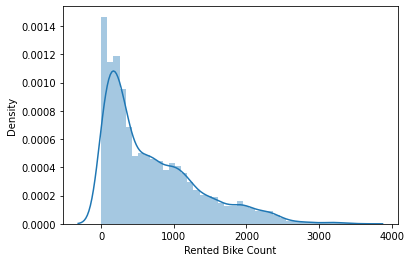

In [13]:
# Cecking distribution of dependent variable 'Rented Bike Count'
sns.distplot(df['Rented Bike Count'])

###It can be observed that the distribution of the dependent variable is skewed. So we will apply log1p transformation.


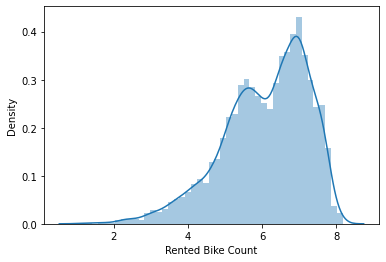

In [14]:
#Applying log1p transformation
sns.distplot(np.log1p(df['Rented Bike Count'].replace(0, np.nan)))

#EDA on numerical features

In [15]:
#Obtaining the numerical features
numerical_features=df.describe().columns

In [16]:
#Converting numerical features to list
numerical_features=numerical_features.to_list()

In [17]:
print("Numerical features are:",numerical_features)

Numerical features are: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


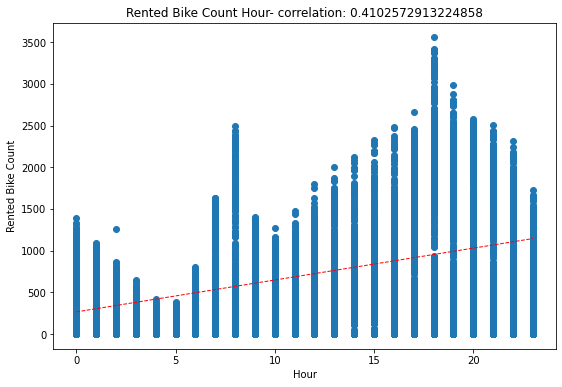

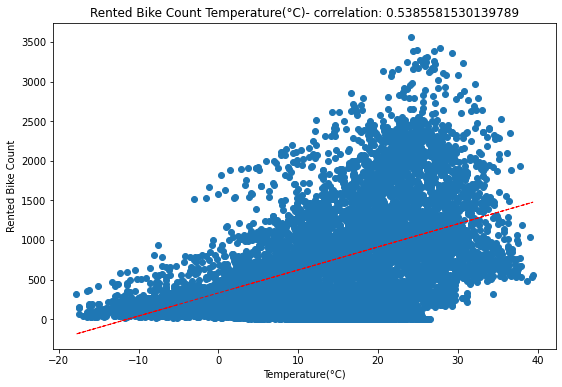

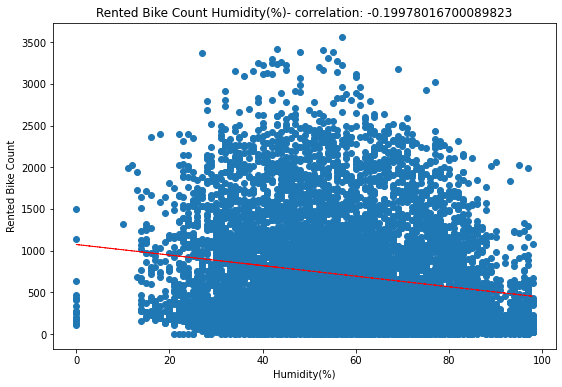

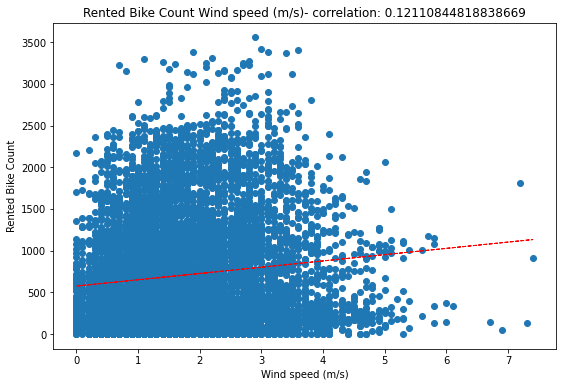

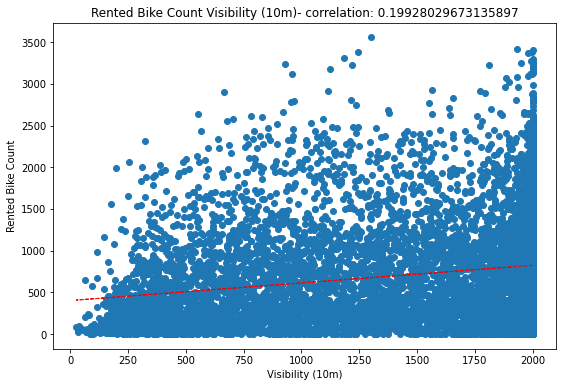

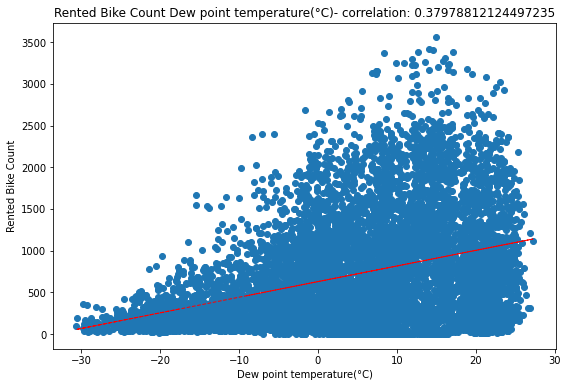

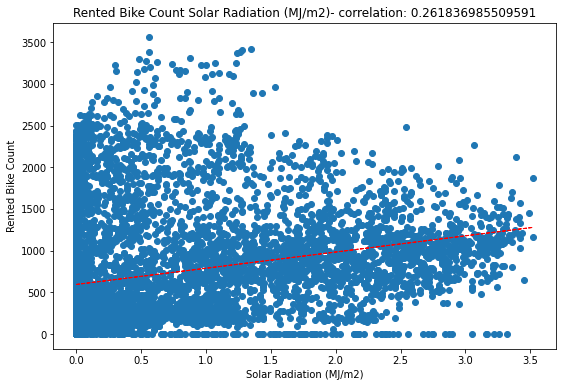

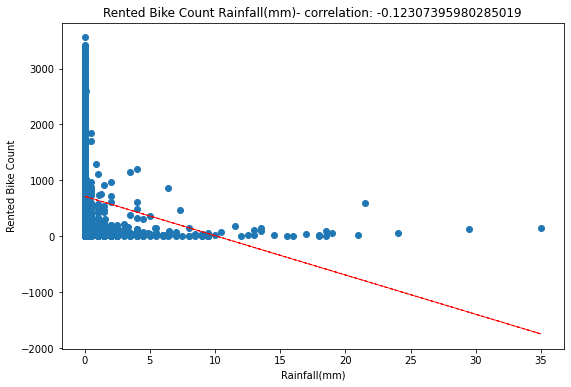

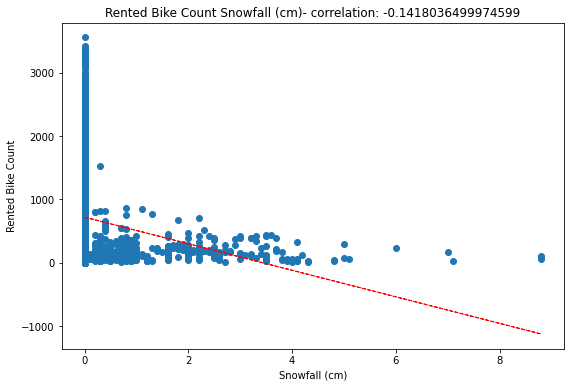

In [18]:
#Checking the correlation between numerical features and the dependent variable
for col in numerical_features:

  #Excluding dependent variable
  if col not in ['Rented Bike Count']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    #Obtaining correlation between independent variable and dependent variable
    correlation = new_df[col].corr(new_df['Rented Bike Count'])

    #Plot scatter plot
    plt.scatter(x=new_df[col], y=new_df['Rented Bike Count'])
    #set x label
    plt.xlabel(col)
    #set y label
    plt.ylabel('Rented Bike Count')
    #set title
    ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))
    
    #Get polynomial fit
    z = np.polyfit(new_df[col], new_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(new_df[col])

    plt.plot(new_df[col], y_hat, "r--", lw=1)

#Show the graph
plt.show()

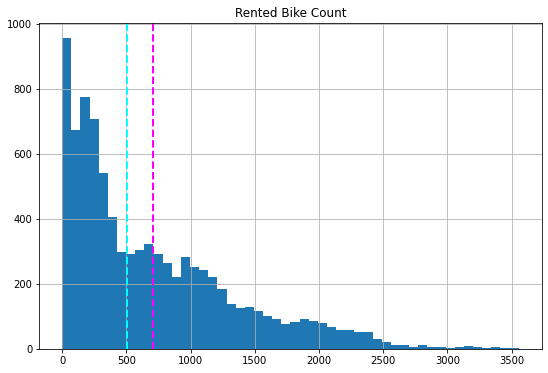

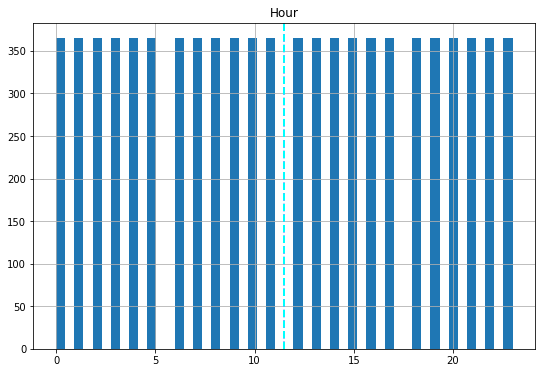

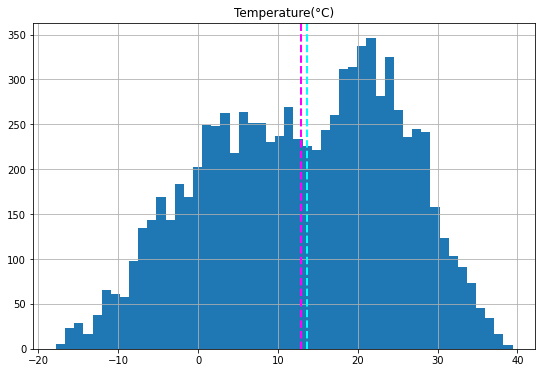

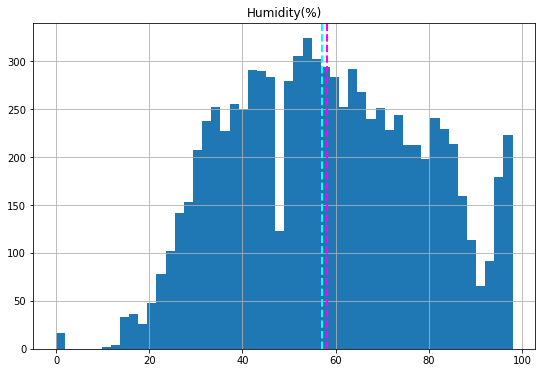

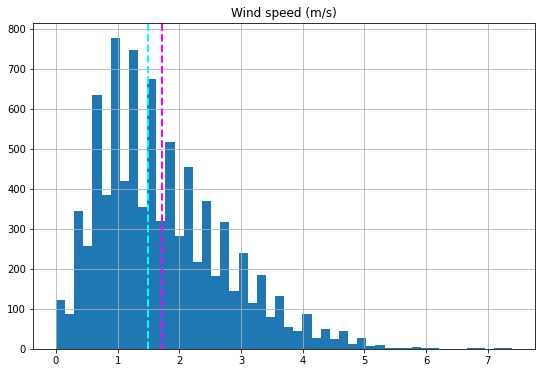

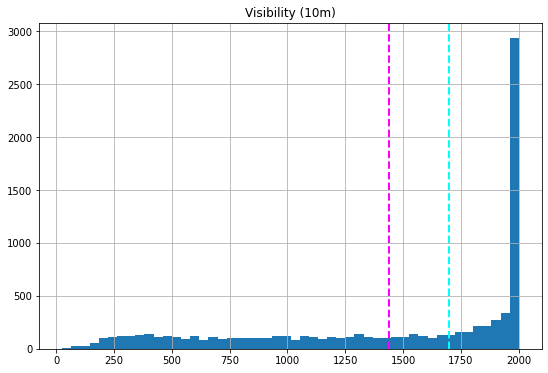

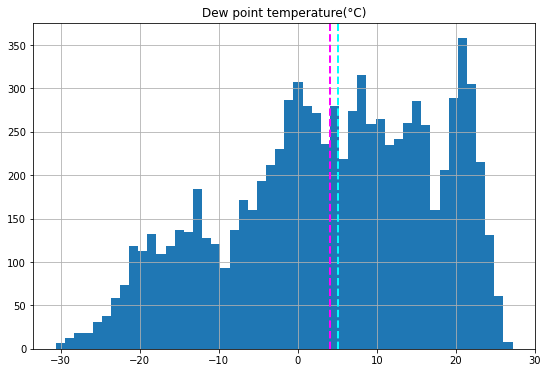

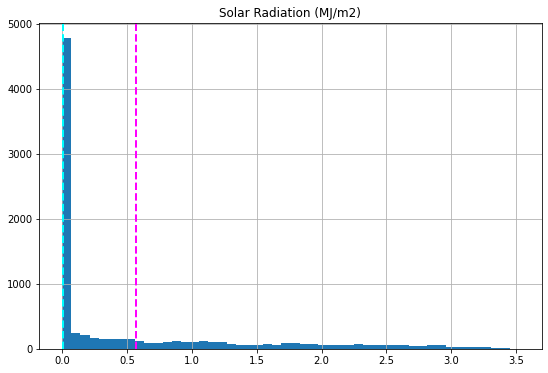

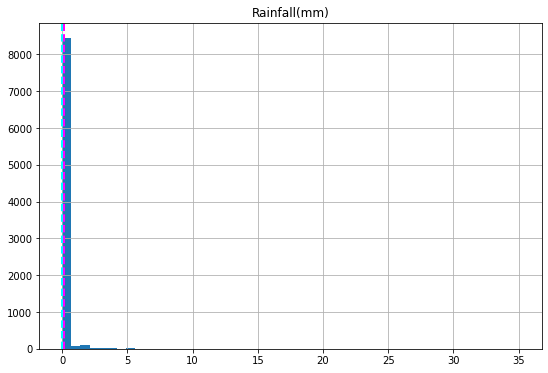

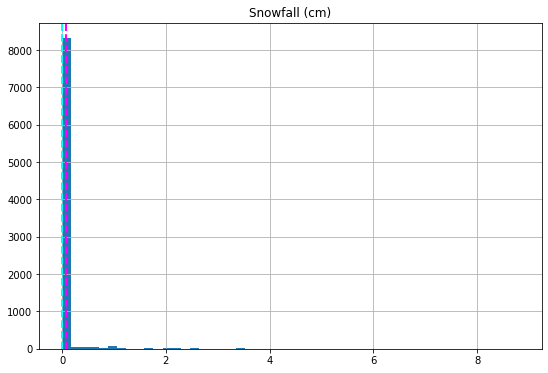

In [19]:
# plot a bar plot for each numerical feature count 
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    #Obtaining histogram
    df[col].hist(bins=50, ax = ax)

    #Show mean and median
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
#Show the graph
plt.show()

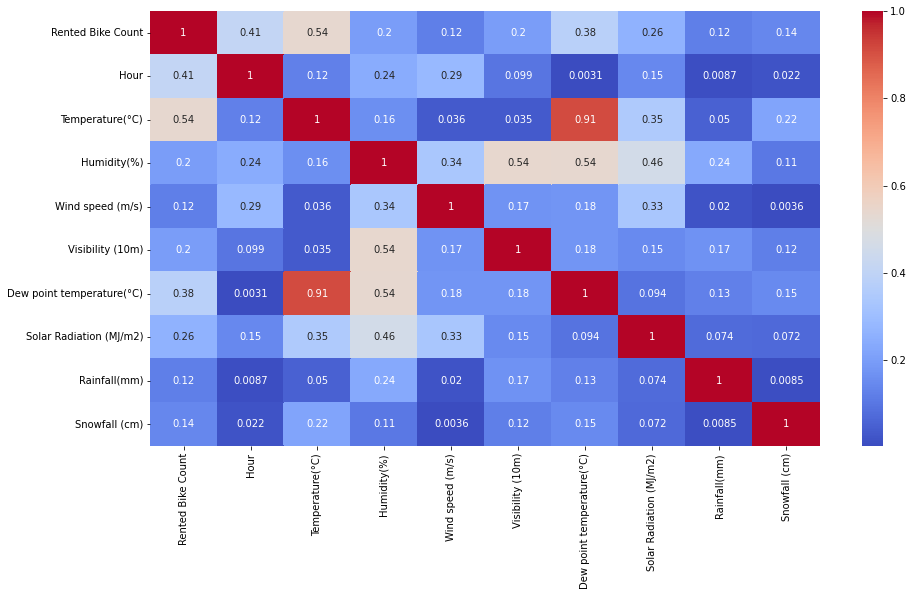

In [20]:
# Correlation
plt.figure(figsize=(15,8))
sns.heatmap(abs(new_df.corr()),annot=True,cmap="coolwarm")
  

###We can observe that the features Temperature and Dew Point Temperature exhibit a high correlation. Therefore we will drop the column Dew Point temperature to prevent multicollinearity.

In [21]:
#Drop column
new_df.drop("Dew point temperature(°C)",axis=1,inplace=True)

#VIF analysis

### We use VIF analysis to check the level of collinearity among the independent and dependent variables.
### Detecting multicollinearity is essential because it reduces the statistical significance of the independent variables.


In [22]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [23]:
#Function calling
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


###VIF value is under 5. Therefore we assume that the multicollinearity between the independent variables is negligible.

#EDA on categorical variables

In [24]:
#Obtaining the data type of features
new_df.dtypes

Date                        object
Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Seasons                     object
Holiday                     object
Functioning Day             object
dtype: object

In [25]:
#Obtaining the categorical variables
categorical_variable=new_df.describe(include=["object"]).columns.tolist()
print("Categorical variables are", categorical_variable)

Categorical variables are ['Date', 'Seasons', 'Holiday', 'Functioning Day']


In [26]:
#Group by "Holiday" on sum
new_df.groupby("Holiday")["Rented Bike Count"].sum()

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [27]:
#Group by "Functioning Day" on sum
new_df.groupby("Functioning Day")["Rented Bike Count"].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

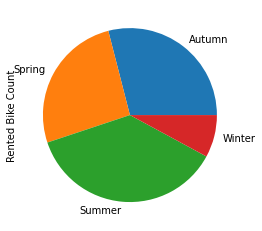

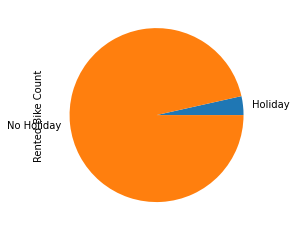

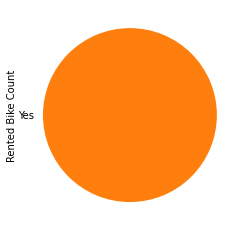

In [28]:
#Plotting for categorical variables
for col in categorical_variable:
  if col not in ['Date']:
    new_df.groupby([col])["Rented Bike Count"].sum().plot.pie()
    plt.show()


### We can observe from the above chart that due to high snowfall and less temperature, the number of rented bike count is deficient in the winters compared to summer and spring. 
### People use rental bikes primarily for short-distance travel like traveling to school or work. That's why the percentage of rented bike count is lesser on a holy day.
### Since bikes are rented only on a functioning day, there is no doubt why the percentage of rented bike count is zero on a non-functioning day.


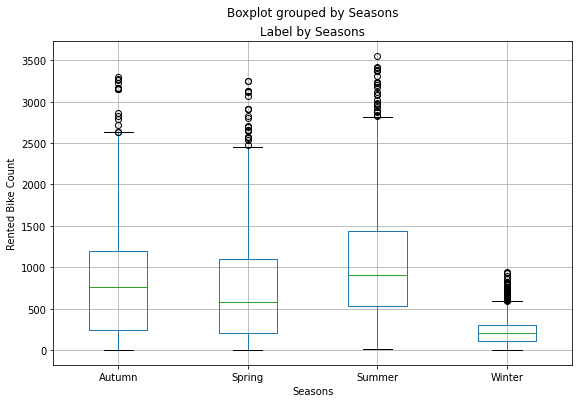

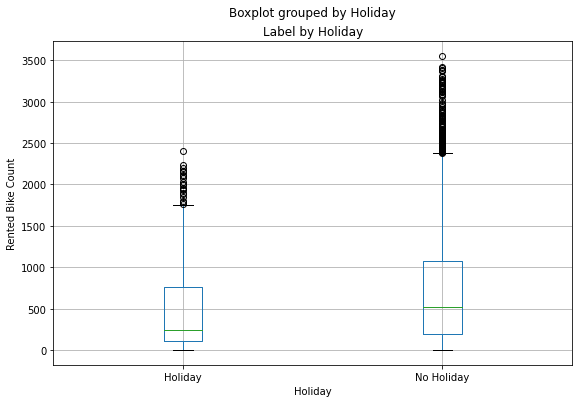

In [29]:
#Obtain boxplot
for col in categorical_variable:
  if col not in ["Date","Functioning Day"]:
      fig = plt.figure(figsize=(9, 6))
      ax = fig.gca()
      new_df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
      ax.set_title('Label by ' + col)
      ax.set_ylabel('Rented Bike Count')
plt.show()

In [30]:
#Label encoding
label={'Holiday':{'Holiday':1,'No Holiday':0},'Functioning Day':{'Yes':0,'No':1}}
new_df=new_df.replace(label)

In [31]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'seasons'.
new_df['Seasons']= label_encoder.fit_transform(df['Seasons'])

#Obtain unique elements in "Seasons" 
new_df['Seasons'].unique()

array([3, 1, 2, 0])

In [32]:
new_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [33]:
#Drop date column
new_df.drop(["Date"],axis=1,inplace=True)

In [34]:
#List of important features
features=new_df.describe(include="all").columns.tolist()

In [35]:
print("Important features after features engineering are:",features)

Important features after features engineering are: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


#Train test split

In [36]:
#Defining independent variables
indipendend_var=[elem for elem in features if elem not in ['Rented Bike Count']]

In [37]:
#Defining dependent variable
dependent_var=["Rented Bike Count"]

### We will apply zscore to normalize the distribution of independent variables.

In [38]:
from scipy.stats import zscore
#Applying zscore
X = new_df[indipendend_var].apply(zscore)

In [39]:
#Applying log1p transformation to the dependent variable
y = np.log1p(df['Rented Bike Count'])

In [40]:
y

0       5.541264
1       5.323010
2       5.159055
3       4.682131
4       4.369448
          ...   
8755    6.911747
8756    6.639876
8757    6.543912
8758    6.569481
8759    6.371612
Name: Rented Bike Count, Length: 8760, dtype: float64

In [41]:
#splitting the data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 11)
(1752, 11)


In [42]:
from sklearn.preprocessing import *
#Scaling the features
#Creating an instance of the scaler
scaler=StandardScaler()
#Fitting scaler
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.50774916 -0.38874606  0.18996015 ...  1.35175828 -0.23202281
  -0.18254726]
 [ 0.9408263   1.29850393 -0.05608294 ...  0.45587006 -0.23202281
  -0.18254726]
 [-0.06968702  1.42379477 -0.05608294 ...  0.45587006 -0.23202281
  -0.18254726]
 ...
 [-0.06968702  1.05627497 -0.05608294 ...  0.45587006 -0.23202281
  -0.18254726]
 [-1.65763652 -0.38039334  0.0423343  ... -0.44001816 -0.23202281
  -0.18254726]
 [ 1.22954439 -0.48062601  1.22334111 ... -0.44001816 -0.23202281
  -0.18254726]]
[[-1.22455939 -0.17992799  0.73125494 ... -0.44001816 -0.23202281
  -0.18254726]
 [-1.36891843  0.73887151  0.97729803 ... -1.33590637 -0.23202281
  -0.18254726]
 [ 0.79646725 -0.7729713   0.337586   ...  1.35175828 -0.23202281
  -0.18254726]
 ...
 [-1.65763652 -0.2551025   1.37096697 ... -0.44001816 -0.23202281
  -0.18254726]
 [ 1.51826248 -0.04628443  0.337586   ... -1.33590637 -0.23202281
  -0.18254726]
 [-1.65763652 -0.21333888  0.43600324 ... -1.33590637 -0.23202281
  -0.18254726]]


#Defining functions to get evaluation metric's scores and feature importance

In [43]:
def regression_results(actual_y, pred_y, X):
  
    '''This function takes actual and predicted value of target transform tem back and return scores of evaluation metrics''' 
    
    #Reverse transforming the predicted output 
    y_true = np.expm1(actual_y)
    y_pred = np.expm1(pred_y)

    # Calculating regression metrics
    
    MAE = mean_absolute_error(y_true,y_pred)

    MSE  = mean_squared_error(y_true,y_pred)
    
    RMSE = np.sqrt(MSE)
    
    r2 = r2_score(y_true,y_pred)
    
    adj_r2 = 1-(1-r2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
    
    return(round(MAE,2),round(MSE,2),round(RMSE,2),round(r2,2),round(adj_r2,2))


In [44]:
def performance(model):
  
  '''This function takes model as input and return different evaluation metrics' score as dataframe'''
    
  #Doing prediction
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  
  #Calling the function regression_results
  train = regression_results(y_train, y_train_pred, X_train)
  test = regression_results(y_test, y_test_pred, X_test)

  # Storing the scores
  score = {'Metric' : ['MAE', 'MSE', 'RMSE', 'r2', "adj_r2"],
          'Train Score' : [train[0], train[1], train[2], train[3], train[4]],
          "Test Score": [test[0],test[1],test[2],test[3],test[4]]}

  # Create DataFrame
  df = pd.DataFrame(score)
  df.name = model
  return(df)

In [45]:
def feature_impo(model):
  '''This function takes instance of linear model as input and and return feature importance graph '''
  #Store the coefficients of the model into a dataframe
  coefs = pd.DataFrame(
    model.coef_,
    columns=['Coefficients'], index=indipendend_var)
  #Plot importance graph
  coefs.plot(kind='barh', figsize=(9, 7))
  plt.title('Model')
  plt.axvline(x=0, color='.5')
  plt.subplots_adjust(left=.3)

  plt.show()

In [46]:
def feature_importance(model):
  '''This function takes instance of ensemble model as input and returns the feature importance'''
  #Listing features
  features = indipendend_var
  #storing feature importance
  importances = model.feature_importances_
  indices = np.argsort(importances)
  #Plot the feature importance
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

#**Linear Regression**

In [47]:
#Loading libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [48]:
#Fitting the model
reg = LinearRegression().fit(X_train, y_train)

In [49]:
#Model score
print("The model score is:",reg.score(X_train, y_train))

The model score is: 0.7816077753951596


In [50]:
#Obtaining the coefficients
reg.coef_

array([ 0.27344724,  0.60169029, -0.3241732 , -0.02130196,  0.02977144,
       -0.04217236, -0.24248698, -0.01032788, -0.22272405, -0.0818845 ,
       -1.14792033])

In [51]:
#Get length of coefficients
len(reg.coef_)

11

In [52]:
#Obtaining the intercept
print("Intercept of te model is:",reg.intercept_)

Intercept of te model is: 5.903208576573145


In [53]:
#Predicting
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [54]:
#View prediction
y_pred_test

array([5.64606376, 6.28533759, 5.45227601, ..., 5.27503075, 6.79545845,
       5.79869195])

In [55]:
#Storing linear regression evaluation scores
train_result_linear = regression_results(y_train,y_pred_train,X_train)
test_result_linear =  regression_results(y_test,y_pred_test,X_test)

In [56]:
print("MAE, MSE, RMSE, r2 and adjusted r2 are:", train_result_linear)

MAE, MSE, RMSE, r2 and adjusted r2 are: (287.44, 202203.58, 449.67, 0.51, 0.51)


In [57]:
#Calling function
print("Performance of Linear Regression")
performance(reg)

Performance of Linear Regression


,Metric,Train Score,Test Score
0,MAE,287.44,279.07
1,MSE,202203.58,195114.04
2,RMSE,449.67,441.72
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


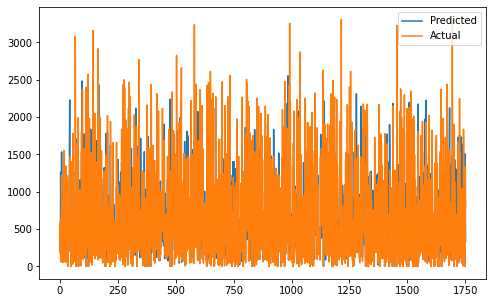

In [58]:
#Actual v/s prediction plot
plt.figure(figsize=(8,5))
plt.plot(np.array(np.expm1(y_pred_test)))
plt.plot(np.array(np.expm1(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Linear Regression-Feature Importance


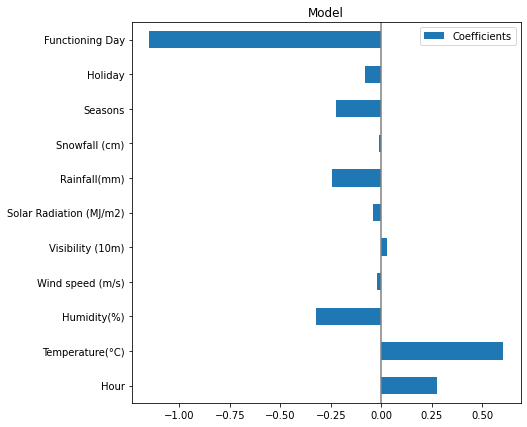

In [59]:
#Calling function
print("Linear Regression-Feature Importance")
feature_impo(reg)

###A model is said to be the best model when the R2 score is close to 1 and the MAE is low. 
### With an r2 score of .53, linear regression fails in terms of accuracy.

#Lasso Regression

In [60]:
from sklearn.linear_model import Lasso
#Creating an instance of the model
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
#Fitting the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [61]:
lasso.coef_

array([ 0.27337186,  0.60148173, -0.32387565, -0.02119993,  0.02979608,
       -0.04187141, -0.24241365, -0.01029077, -0.22262542, -0.0817894 ,
       -1.147795  ])

In [62]:
print("Lasso score is :",lasso.score(X_train, y_train))

Lasso score is : 0.7816077182837026


In [63]:
#Prediction
y_pred_lasso = lasso.predict(X_test)

In [64]:
print("Performance of Lasso Regression")
performance(lasso)

Performance of Lasso Regression


,Metric,Train Score,Test Score
0,MAE,287.46,279.09
1,MSE,202234.96,195153.97
2,RMSE,449.71,441.76
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


### The performance of Lasso regression is also poor.

#Lasso Cross Validation

In [65]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.5367512729774678


In [67]:
lasso=lasso_regressor.best_estimator_

In [68]:
y_pred_lasso_test = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

In [69]:
#Storing lasso regression evaluation scores
train_result_lasso = regression_results(y_train,y_pred_lasso_train,X_train)
test_result_lasso =  regression_results(y_test,y_pred_lasso_test,X_test)

In [70]:
print("Scores of Lasso after cross-validation and hyperparameter tuning")
performance(lasso)

Scores of Lasso after cross-validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,287.44,279.07
1,MSE,202203.58,195114.04
2,RMSE,449.67,441.72
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


### Despite the application of cross-validation and hyperparameter tuning, there has been no improvement in Lasso regularization scores.

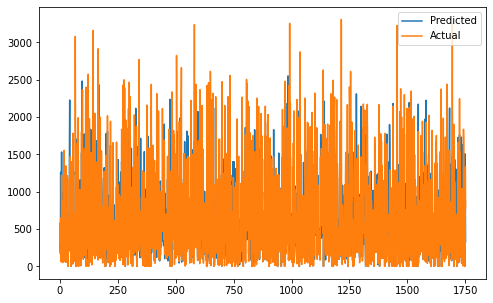

In [71]:
plt.figure(figsize=(8,5))
plt.plot(np.expm1(y_pred_lasso))
plt.plot(np.array(np.expm1(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Lasso Regression - Feature Importance


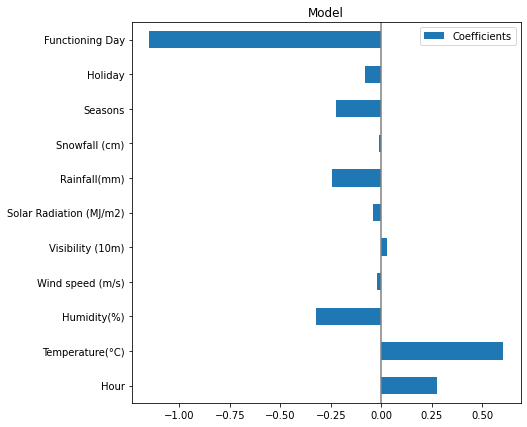

In [72]:
print("Lasso Regression - Feature Importance")
feature_impo(lasso)

#Ridge Regression

In [73]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [74]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.5359927444794051


In [75]:
ridge=ridge_regressor.best_estimator_

In [76]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_ridge_train = ridge.predict(X_train)

In [77]:
#Storing ridge regression evaluation scores
train_result_ridge = regression_results(y_train,y_pred_ridge_train,X_train)
test_result_ridge =  regression_results(y_test,y_pred_ridge_test,X_test)

In [78]:
print("Performance of Ridge Regression")
performance(ridge)

Performance of Ridge Regression


,Metric,Train Score,Test Score
0,MAE,287.45,279.08
1,MSE,202213.50,195127.98
2,RMSE,449.68,441.73
3,r2,0.51,0.53
4,adj_r2,0.51,0.53


###The performance of ridge regression is also poor.

Ridge Regression-Feature Importance


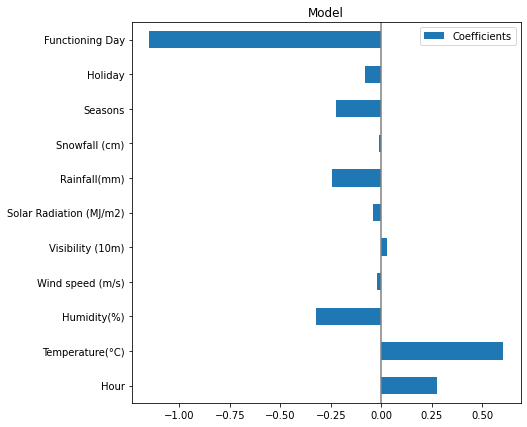

In [79]:
print("Ridge Regression-Feature Importance")
feature_impo(ridge)

###We can see that the r2 score of linear regression is very poor. Despite regularization, the score did not improve.
###One reason for this is that regulation helps to fix overfitting, but our model is not overfitted. Since R2 scores are poor, we can clearly conclude that linear regression fails to be effective in our problem.
 
###So we will switch to ensemble methods.

#Random Forest Regressor

###The first ensemble model that applied is Random forest.


In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
#RandomForest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)

In [82]:
print("Scores of Random Forest")
performance(model_rf)

Scores of Random Forest


,Metric,Train Score,Test Score
0,MAE,53.97,142.27
1,MSE,9073.50,57278.45
2,RMSE,95.25,239.33
3,r2,0.98,0.86
4,adj_r2,0.98,0.86


###We can see a drastic improvement in the r2 score compared to linear regression. Predicting using random model regression gives an r2 score of .86. 

## Random Forest cross validation

In [83]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [84]:
print("The best fit alpha value is found out to be :",param_dict)

The best fit alpha value is found out to be : {'n_estimators': [50, 80, 100], 'max_depth': [4, 6, 8], 'min_samples_split': [50, 100, 150], 'min_samples_leaf': [40, 50]}


In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = RandomizedSearchCV(estimator=rf_model,scoring="neg_mean_squared_error",
                       param_distributions = param_dict,
                       cv = 5, verbose=2)
#Fitting model
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samp

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [87]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [88]:
rf_optimal_model = rf_grid.best_estimator_

In [89]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [90]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

# Get the probabilities on train and test
y_pred_train_rf = rf_optimal_model.predict(X_train)
y_pred_test_rf = rf_optimal_model.predict(X_test)

In [91]:
#Storing random forest regression evaluation scores
train_result_rf = regression_results(y_train,y_pred_train_rf,X_train)
test_result_rf =  regression_results(y_test,y_pred_test_rf,X_test)

In [92]:
test_class_preds

array([5.29528232, 6.14873792, 5.74829712, ..., 6.2316572 , 6.95491477,
       6.28827167])

In [93]:
print("random forest best score",rf_grid.best_score_)

random forest best score -0.25542681817162183


In [94]:
print("performance of Random Forest after cross validation and hyperparameter tuning")
performance(rf_optimal_model)

performance of Random Forest after cross validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,174.55,177.76
1,MSE,83468.12,88318.10
2,RMSE,288.91,297.18
3,r2,0.80,0.79
4,adj_r2,0.80,0.79


###Random Forest train and test r2 scores were dissimilar before applying cross-validation and hyperparameter tuning but are now almost identical.

Random Forest-Feature Importance


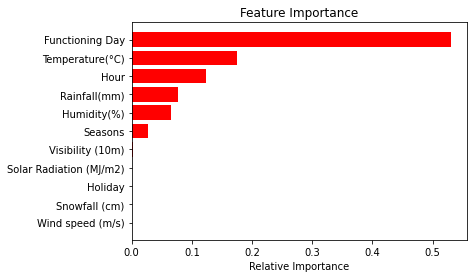

In [95]:
print("Random Forest-Feature Importance")
feature_importance(rf_optimal_model)

###In random forest the feature 'functioning day' has the highest impact on the dependent variable "Rented Bike count". The second most important feature is "Temperature".

#GBM

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
# Hyperparameter tuning

gbm = GradientBoostingRegressor() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbm_model = GridSearchCV(gbm, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
gbm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [98]:
gbm_model.predict(X_test)

array([5.54881409, 6.30420496, 5.8550239 , ..., 6.02556502, 6.93637844,
       6.32224064])

In [99]:

print("Evaluation metrics for GBM")
performance(gbm_model)

Evaluation metrics for GBM


,Metric,Train Score,Test Score
0,MAE,196.04,196.02
1,MSE,104082.42,108884.17
2,RMSE,322.62,329.98
3,r2,0.75,0.74
4,adj_r2,0.75,0.74


###The train and test r2 scores of a gbm model are almost identical.

#GBM CROSS VALIDATION

In [100]:
# Grid search
gbm = GradientBoostingRegressor() 

gbm_grid = RandomizedSearchCV(estimator=gbm,scoring="neg_mean_squared_error",
                       param_distributions = param_dict,
                       cv = 5, verbose=2)

gbm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=8, min

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [101]:
gbm_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50, n_estimators=80)

In [102]:
gbm_optimal_model = gbm_grid.best_estimator_

In [103]:
gbm_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [104]:
# Making predictions on train and test data

train_class_preds = gbm_optimal_model.predict(X_train)
test_class_preds = gbm_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = gbm_optimal_model.predict(X_train)
test_preds = gbm_optimal_model.predict(X_test)

In [105]:
y_pred_train_gbm =  gbm_optimal_model.predict(X_train)
y_pred_test_gbm  = gbm_optimal_model.predict(X_test)

In [106]:
#Storing gradient boosting machine evaluation scores
train_result_gbm = regression_results(y_train,y_pred_train_gbm,X_train)
test_result_gbm =  regression_results(y_test,y_pred_test_gbm,X_test)

In [107]:
print("Scores of GBM after cross-validation and hyperparameter tuning")
performance(gbm_optimal_model)

Scores of GBM after cross-validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,127.27,143.68
1,MSE,43661.96,57916.74
2,RMSE,208.95,240.66
3,r2,0.89,0.86
4,adj_r2,0.89,0.86


###After the cross-validation and hyperparameter tuning  we can see a significant improvement in GBM's r2 score.

GBM-Feature Importance


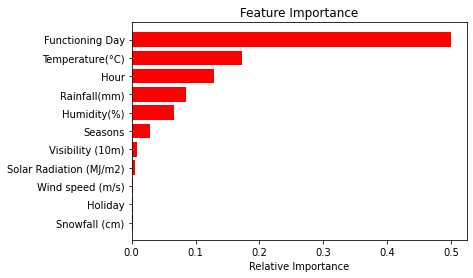

In [108]:
print("GBM-Feature Importance" )
feature_importance(gbm_optimal_model)

###In GBM also the feature 'functioning day' has the highest impact on the dependent variable "Rented Bike count" and the second most important feature is "Temperature".

#XGBoost

In [109]:
import xgboost as xgb

In [110]:
# Instantiation
xgb = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 1000, seed = 123)
  
# Fitting the model
xgb.fit(X_train, y_train)
  
# Predict the model
pred = xgb.predict(X_test)
  

[16:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:

print("Evaluation metrics for XGBoost")
performance(xgb)

Evaluation metrics for XGBoost


,Metric,Train Score,Test Score
0,MAE,120.88,146.87
1,MSE,39415.53,59618.05
2,RMSE,198.53,244.17
3,r2,0.91,0.86
4,adj_r2,0.90,0.86


###XGBoost gives a better r2 score than other models.

In [112]:
# run randomized search
from sklearn.model_selection import cross_val_score
cross_val_score(xgb,X_train,y_train,scoring='r2')

[16:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.92411057, 0.92602036, 0.93066048, 0.90627341, 0.92827348])

#XGB CROSS VALIDATION

In [113]:
import xgboost as xgboost

In [114]:
params = {
    'n_estimators':[500],
    'max_depth': [4,6,8],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'eval_metric': ['rmse']}

xgb = xgboost.XGBRegressor(nthread=-1)

n_iter_search = 100
xgb_grid = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

xgb_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(nthread=-1), n_iter=100,
                   param_distributions={'eval_metric': ['rmse'],
                                        'max_depth': [4, 6, 8],
                                        'n_estimators': [500],
                                        'objective': ['reg:squarederror',
                                                      'reg:tweedie']},
                   scoring='neg_mean_squared_error')

In [115]:
xgb_grid.best_params_

{'eval_metric': 'rmse',
 'max_depth': 6,
 'n_estimators': 500,
 'objective': 'reg:squarederror'}

In [116]:
xgb_grid.best_estimator_

XGBRegressor(eval_metric='rmse', max_depth=6, n_estimators=500, nthread=-1,
             objective='reg:squarederror')

In [117]:
xgb_optimal_model=xgb_grid.best_estimator_

In [118]:
# Making predictions on train and test data

train_class_preds = xgb_optimal_model.predict(X_train)
test_class_preds = xgb_optimal_model.predict(X_test)


# Get the probabilities on train and test
y_pred_train_xgb = xgb_optimal_model.predict(X_train)
y_pred_test_xgb = xgb_optimal_model.predict(X_test)

In [119]:
#Storing xgboost regression evaluation scores
train_result_xgb = regression_results(y_train,y_pred_train_xgb,X_train)
test_result_xgb =  regression_results(y_test,y_pred_test_xgb,X_test)

In [120]:
print("Evaluation metrics for XGBoost after cross-validation and hyperparameter tuning")
performance(xgb_optimal_model)

Evaluation metrics for XGBoost after cross-validation and hyperparameter tuning


,Metric,Train Score,Test Score
0,MAE,75.20,139.62
1,MSE,16533.00,54594.92
2,RMSE,128.58,233.66
3,r2,0.96,0.87
4,adj_r2,0.96,0.87


XGBoost-Feature Importance


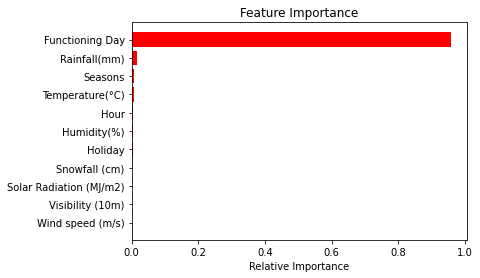

In [121]:

print("XGBoost-Feature Importance") 
feature_importance(xgb_optimal_model)

###In GBM also the feature 'functioning day' has the highest impact on the dependent variable "Rented Bike count" and the second most important feature here is "Rainfall".

#Creating comparison data frame of scores of different models after cross-validation and hyperparameter tuning.

In [122]:
regresser = ['Linear ', 'Lasso ', 'Ridge', 'Random Forest CV', 'GBMCV' , 'XGboost CV']
#Seperating evaluation scores
train_MAE = [train_result_linear[0],train_result_lasso[0],train_result_ridge[0],train_result_rf[0],train_result_gbm[0],train_result_xgb[0]]
test_MAE = [test_result_linear[0],test_result_lasso[0],test_result_ridge[0],test_result_rf[0],test_result_gbm[0],test_result_xgb[0]]

train_MSE = [train_result_linear[1],train_result_lasso[1],train_result_ridge[1],train_result_rf[1],train_result_gbm[1],train_result_xgb[1]]
test_MSE = [test_result_linear[1],test_result_lasso[1],test_result_ridge[1],test_result_rf[1],test_result_gbm[1],test_result_xgb[1]]

train_RMSE = [train_result_linear[2],train_result_lasso[2],train_result_ridge[2],train_result_rf[2],train_result_gbm[2],train_result_xgb[2]]
test_RMSE = [test_result_linear[2],test_result_lasso[2],test_result_ridge[2],test_result_rf[2],test_result_gbm[2],test_result_xgb[2]]

train_r2 = [train_result_linear[3],train_result_lasso[3],train_result_ridge[3],train_result_rf[3],train_result_gbm[3],train_result_xgb[3]]
test_r2 = [test_result_linear[3],test_result_lasso[3],test_result_ridge[3],test_result_rf[3],test_result_gbm[3],test_result_xgb[3]]

train_adj_r2 = [train_result_linear[4],train_result_lasso[4],train_result_ridge[4],train_result_rf[4],train_result_gbm[4],train_result_xgb[4]]
test_adj_r2 = [test_result_linear[4],test_result_lasso[4],test_result_ridge[4],test_result_rf[4],test_result_gbm[4],test_result_xgb[4]]

In [123]:
#Creating a dataframe of evaluation scores of all te models after cross validation and hyper parameter tuning
evalation_matrix=pd.DataFrame({'Model':regresser, 'Train MAE': train_MAE, 'Test MAE': test_MAE, 'Train MSE': train_MSE, 'Test MSE': test_MSE, 'Train RMSE': train_RMSE, 'Test RMSE': test_RMSE,
              'Train r2': train_r2, 'Test r2': test_r2, 'Train adj r2': train_adj_r2, 'Test adj r2': test_adj_r2})
print("Evaluation metrics for different algorithms:")
evalation_matrix

Evaluation metrics for different algorithms:


,Model,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train r2,Test r2,Train adj r2,Test adj r2
0,Linear,287.44,279.07,202203.58,195114.04,449.67,441.72,0.51,0.53,0.51,0.53
1,Lasso,287.44,279.07,202203.58,195114.04,449.67,441.72,0.51,0.53,0.51,0.53
2,Ridge,287.45,279.08,202213.50,195127.98,449.68,441.73,0.51,0.53,0.51,0.53
3,Random Forest CV,174.55,177.76,83468.12,88318.10,288.91,297.18,0.80,0.79,0.80,0.79
4,GBMCV,127.27,143.68,43661.96,57916.74,208.95,240.66,0.89,0.86,0.89,0.86
5,XGboost CV,75.20,139.62,16533.00,54594.92,128.58,233.66,0.96,0.87,0.96,0.87


### *   R2 score in Linear Regression is 0.51 for the train data and 0.53 for the test data. Thus the Linear Regression model fails in this case.
### * Comparing the R2 score of all the models, one can see that XGBoost performs better than other models.
### *   Gradient Boosting Machine has a test accuracy of 86%, making it the second-best model.
### *   Random Forest is also found to perform well on the data.


##**Conclusion**:



###The project focuses on predicting bike sharing demand using the Seoul dataset.
###Of the different models used for this issue, the XGBoost performs better than the other models, with a train R2 score of 0.96 and a test R2 score of 0.87. XGboost gives the least MAE among the models. The most important features for predicting the dependent variable (number of hired bikes) for XGBoost are functioning day, rainfall, season, and temperature.
### This project will be helpful for the company to predict the hourly bike demand and enrich the user experience.